<a href="https://www.kaggle.com/code/gpreda/movielens-exploratory-data-analysis?scriptVersionId=128068329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

This Notebook is exploring the MovieLens data.

# Analysis preparation

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plot_utils import plot_count

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Read users data

In [3]:
user_columns = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users_df = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.user', sep='|', names=user_columns) 
users_df.head(2)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


## Read ratings data

In [4]:
ratings_columns = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.data', sep='\t', names=ratings_columns)
ratings_df.drop( "unix_timestamp", inplace = True, axis = 1 ) 
ratings_df.head(2)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3


## Read and clean movie data

In [5]:
def clean_title(title):
    return re.sub("[\(\[].*?[\)\]]", "",title)

def process_genre(series):
    genres = series.index[6:-2]
    
    text = []
    for i in genres:
        if series[i] == 1:
            text.append(i)
            break
    return ", ".join(text)

### Read genres

We get the list of names for movie genres from **u.genre** file.

In [6]:
genre_df = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.genre', sep='|', encoding='latin-1')
genre_columns = ["unknown"] + list(genre_df[genre_df.columns[0]].values)
print(genre_columns)

['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [7]:
movie_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies_df = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.item', sep='|', names=movie_columns+genre_columns,
                     encoding='latin-1')

In [8]:
movies_df.head(5)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Let's remove the issuing date from the movie title. Also, we create a copy of the movie dataset where we concatenate the genres, so that we have a list with the genres, and we eliminate the separate genre columns.

In [9]:
movies_df['title'] = movies_df['title'].apply(clean_title)
movies_df['title'] = movies_df['title'].str.strip()

movies_df['genre'] = movies_df.apply(process_genre,axis=1)

In [10]:
movies_df.head(2)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre
0,1,Toy Story,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Animation
1,2,GoldenEye,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,Action


In [11]:
movies_red_df = movies_df.copy()
movies_red_df.drop(movies_red_df.columns[[2,3,4]], inplace = True, axis = 1)
movies_red_df.drop(genre_columns,axis=1,inplace=True)

movies_red_df.head(5)

,movie_id,title,genre
0,1,Toy Story,Animation
1,2,GoldenEye,Action
2,3,Four Rooms,Thriller
3,4,Get Shorty,Action
4,5,Copycat,Crime


# What is the ratings distribution?

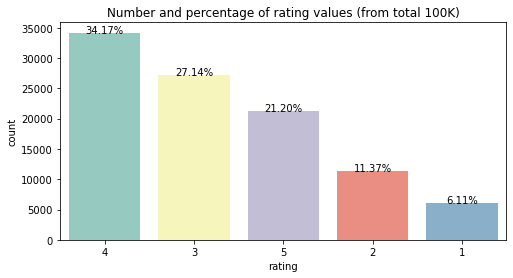

In [12]:
plot_count("rating", title="rating values (from total 100K)", df=ratings_df, size=2)

# What movies have most ratings?

In [13]:
movie_ratings_df = movies_df.merge(ratings_df, on="movie_id", how="inner")

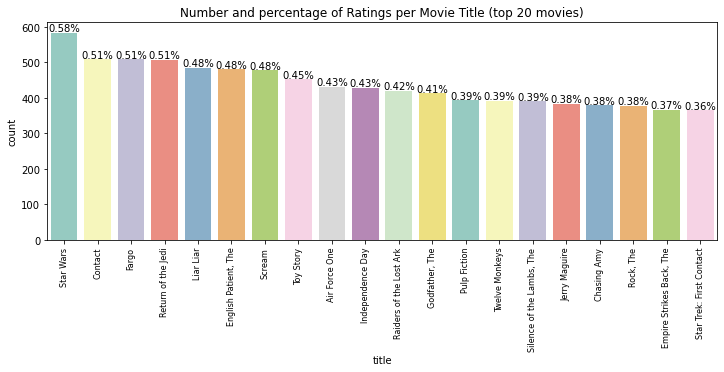

In [14]:
plot_count(feature="title", title="Ratings per Movie Title (top 20 movies)", df=movie_ratings_df, size=3)

# What movies have best ratings?

In [15]:
movie_ratings_df.sort_values(by="rating", ascending=False)[["title", "release_date", "genre", "rating"]].head(10)

,title,release_date,genre,rating
33615,Cape Fear,01-Jan-1991,Thriller,5
53455,One Flew Over the Cuckoo's Nest,01-Jan-1975,Drama,5
53463,One Flew Over the Cuckoo's Nest,01-Jan-1975,Drama,5
31674,Young Frankenstein,01-Jan-1974,Comedy,5
17608,Phenomenon,29-Jun-1996,Drama,5
53461,One Flew Over the Cuckoo's Nest,01-Jan-1975,Drama,5
17606,Phenomenon,29-Jun-1996,Drama,5
53460,One Flew Over the Cuckoo's Nest,01-Jan-1975,Drama,5
53459,One Flew Over the Cuckoo's Nest,01-Jan-1975,Drama,5
70108,Rob Roy,01-Jan-1995,Drama,5


Let's first count how many ratings have each movie.

In [16]:
movie_ratings_agg_df = movie_ratings_df.groupby(["title"])["rating"].count().reset_index()
movie_ratings_agg_df.columns = ["title", "ratings_number"]
movie_ratings_agg_df.sort_values(by="ratings_number", ascending = False).head(10)

,title,ratings_number
1393,Star Wars,583
331,Contact,509
496,Fargo,508
1232,Return of the Jedi,507
858,Liar Liar,485
458,"English Patient, The",481
1280,Scream,478
1517,Toy Story,452
32,Air Force One,431
742,Independence Day,429


Merge back the result.

In [17]:
movie_ratings_df = movie_ratings_df.merge(movie_ratings_agg_df, on="title")

In [18]:
movie_ratings_agg_df = movie_ratings_df.groupby(["title", "ratings_number"])["rating"].mean().reset_index()
movie_ratings_agg_df.columns = ["title", "ratings_number", "ratings_mean"]
movie_ratings_agg_df.sort_values(by="ratings_mean", ascending = False).head(10)

,title,ratings_number,ratings_mean
1170,Prefontaine,3,5.0
631,"Great Day in Harlem, A",1,5.0
460,Entertaining Angels: The Dorothy Day Story,1,5.0
1466,They Made Me a Criminal,1,5.0
1270,"Saint of Fort Washington, The",2,5.0
1274,Santa with Muscles,2,5.0
30,Aiqing wansui,1,5.0
942,Marlene Dietrich: Shadow and Light,1,5.0
1354,Someone Else's America,1,5.0
1382,Star Kid,3,5.0


Let's select only movies with more than 400 ratings.

In [19]:
sel_movie_ratings_df = movie_ratings_df.loc[movie_ratings_df.ratings_number > 400]

In [20]:
sel_movie_ratings_agg_df = sel_movie_ratings_df.groupby(["title", "ratings_number"])["rating"].mean().reset_index()
sel_movie_ratings_agg_df.columns = ["title", "ratings_number", "ratings_mean"]
sel_movie_ratings_agg_df.sort_values(by="ratings_mean", ascending = False).head(10)

,title,ratings_number,ratings_mean
10,Star Wars,583,4.358491
4,"Godfather, The",413,4.283293
7,Raiders of the Lost Ark,420,4.252381
3,Fargo,508,4.155512
8,Return of the Jedi,507,4.007890
11,Toy Story,452,3.878319
1,Contact,509,3.803536
2,"English Patient, The",481,3.656965
0,Air Force One,431,3.631090
9,Scream,478,3.441423


# What is the number and mean of ratings distribution?

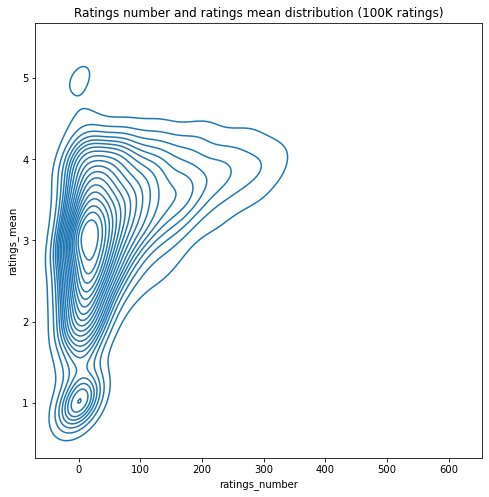

In [21]:
f, ax = plt.subplots(1,1, figsize=(8, 8))
plt.title("Ratings number and ratings mean distribution (100K ratings)")
sns.kdeplot(data=movie_ratings_agg_df, x="ratings_number", y="ratings_mean", levels=20)
plt.show()

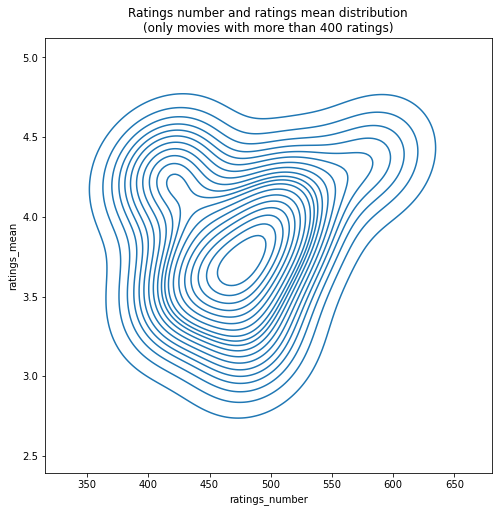

In [22]:
f, ax = plt.subplots(1,1, figsize=(8, 8))
plt.title("Ratings number and ratings mean distribution\n(only movies with more than 400 ratings)")
sns.kdeplot(data=sel_movie_ratings_agg_df, x="ratings_number", y="ratings_mean", levels=20)
plt.show()

# What is the genre distribution?

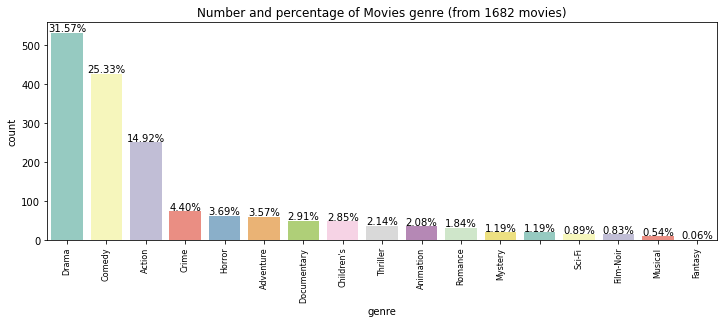

In [23]:
plot_count(feature="genre", title="Movies genre (from 1682 movies)", df=movies_df, size=3)

# Which genre has most ratings?

In [24]:
movie_ratings_agg_df = movie_ratings_df.groupby(["genre"])["rating"].count().reset_index()
movie_ratings_agg_df.columns = ["genre", "ratings_number"]
movie_ratings_agg_df.sort_values(by="ratings_number", ascending = False).head(10)

,genre,ratings_number
8,Drama,27050
1,Action,25589
5,Comedy,22796
6,Crime,4988
2,Adventure,3448
3,Animation,3236
11,Horror,2946
4,Children's,2557
13,Mystery,1585
15,Sci-Fi,1181


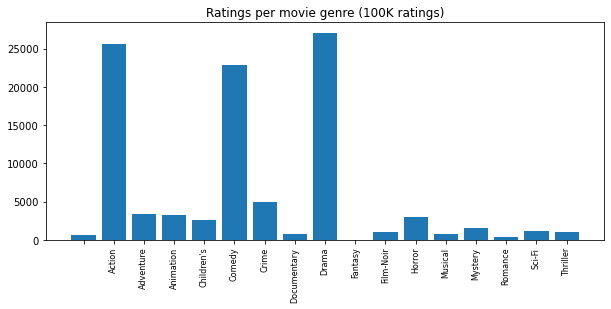

In [25]:
f, ax = plt.subplots(1,1, figsize=(10,4))
plt.bar(x="genre", height="ratings_number", data=movie_ratings_agg_df)
plt.xticks(rotation=90, size=8)
plt.title("Ratings per movie genre (100K ratings)")
plt.show()

# What movies genre has highest (mean) ratings?

In [26]:
movie_ratings_agg_df = movie_ratings_df.groupby(["genre"])["rating"].mean().reset_index()
movie_ratings_agg_df.columns = ["genre", "ratings_average"]
movie_ratings_agg_df.sort_values(by="ratings_average", ascending = False)

,genre,ratings_average
10,Film-Noir,4.064229
6,Crime,3.707298
12,Musical,3.696845
0,,3.684553
8,Drama,3.684288
7,Documentary,3.673712
13,Mystery,3.666246
3,Animation,3.634734
2,Adventure,3.515081
1,Action,3.480245


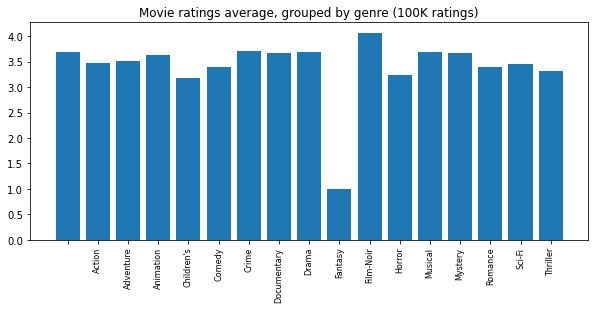

In [27]:
f, ax = plt.subplots(1,1, figsize=(10,4))
plt.bar(x="genre", height="ratings_average", data=movie_ratings_agg_df)
plt.xticks(rotation=90, size=8)
plt.title("Movie ratings average, grouped by genre (100K ratings)")
plt.show()